## Support Vector Machine

### A Máquina de Vetores de Suporte (SVM, do inglês Support Vector Machine) é tradicionalmente conhecida por sua aplicação em problemas de classificação, mas também pode ser adaptada para problemas de regressão. Aqui está uma explicação do funcionamento da SVM em modelos de regressão:

### 1 - **Objetivo da Regressão SVM**

#### Enquanto em problemas de classificação a SVM busca encontrar um hiperplano que separe as classes com a maior margem possível, em regressão, a SVM busca encontrar uma função que aproxime a relação entre as variáveis independentes (preditoras) e a variável dependente (alvo).

### 2 - **Hipótese de Regressão**

#### A SVM para regressão parte do princípio de que os dados podem ser aproximados por uma função linear (ou não-linear, dependendo do kernel utilizado).

### 3 - **Margem Epsilon-Insensitive**

#### Para lidar com o erro de regressão, a SVM utiliza uma margem epsilon-insensível. Isso significa que pequenos erros de predição dentro de uma margem epsilon são ignorados no processo de otimização do modelo.

### 4 - **Função Objetivo**

#### A função objetivo da SVM para regressão é minimizar o erro de predição enquanto mantém a margem epsilon-insensível. Formalmente, isso é representado pela minimização da seguinte expressão: $$\frac{1}{2} \mathbf{w}^T \mathbf{w} + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)$$ sujeita às restrições: $$y_i - \mathbf{w}^T \mathbf{x}_i - b \leq \epsilon + \xi_i$$ $$\mathbf{w}^T \mathbf{x}_i + b - y_i \leq \epsilon + \xi_i^*$$ $$\xi_i, \xi_i^* \geq 0$$


### 5 - **Kernel Trick**

#### Assim como na SVM de classificação, a SVM de regressão pode utilizar kernels para mapear os dados para um espaço de maior dimensão, onde a relação entre as variáveis é mais facilmente separável. Kernels comuns incluem o linear, polinomial e RBF (radial basis function).

### 6 - **Seleção de Parâmetros**

#### Na prática, ao usar SVM para regressão, é importante ajustar os parâmetros como 𝐶 (parâmetro de regularização) e 𝜖 (margem epsilon), além de escolher o kernel adequado, através de validação cruzada ou outros métodos de seleção de modelos.

### 7 - **Predição**

#### Após treinado, o modelo SVM de regressão pode ser usado para fazer previsões para novos dados, onde ele estima o valor da variável dependente com base nas variáveis independentes.

-----------------------------------------------------------------------------------------------------------------------------------------------------

#### Para implementar um modelo SVM (Support Vector Machine) para regressão usando scikit-learn, vamos configurar os parâmetros conforme especificado e seguir com a avaliação e visualização dos resultados usando as métricas e gráficos adequados.

In [33]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [34]:
# Carregar os dados
data = pd.read_csv('datasets/SPAECE_2018_codificado.csv')

In [35]:
# Dividir as features e o target
features = ['SEXO', 'IDADE', 'FORMACAO DA MAE', 'FORMACAO DO PAI', 'ACESSO A INTERNET', 
            'NUMERO DE COMPUTADORES', 'INICIOU OS ESTUDOS', 'CURSO O ENSINO FUNDAMENTAL', 
            'REPROVOU', 'ABANDONOU A ESCOLA', 'GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE', 
            'PROFESSORES TIRAM DUVIDAS', 'PROFESSORES CORRIGEM AS ATIVIDADES', 'TURNO ESCOLAR', 
            'NUMERO DE PONTOS EM PORTUGUES','PROFICIENCIA EM PORTUGUES']

# Retirado 'NUMERO DE PONTOS EM MATEMATICA' por conta do viés com a coluna target 

X = data[features]
y = data['PROFICIENCIA EM MATEMATICA']

In [36]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Treinar o modelo SVM (Support Vector Machine) com kernel linear
model = SVR(kernel='linear', C=1.0, epsilon=0.1, tol=0.001, max_iter=100)
model.fit(X_train, y_train)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVR(kernel='linear', max_iter=100)

#### Utilizamos SVR do scikit-learn para configurar um modelo SVM para regressão.
#### kernel='rbf' define o kernel RBF (Radial Basis Function).
#### C=1.0 é o parâmetro de regularização.
#### epsilon=0.1 é o parâmetro epsilon na função de perda da SVM.
#### tol=0.001 é a tolerância numérica para critério de parada.
##### max_iter=1000 define o número máximo de iterações.

In [38]:
# Fazer previsões
y_pred = model.predict(X_test)

In [39]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [40]:
# Exibir as métricas
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 3776.5234975842623
Root Mean Squared Error (RMSE): 61.45342543409816
Mean Absolute Error (MAE): 48.720955150350896
Mean Absolute Percentage Error (MAPE): 18.45182993173553
R² Score: -0.35458524531426816


----------------------------------------------------------------------------------------------------------------------------------------------------------

#### Um valor negativo para o coeficiente de determinação $𝑅^2$ indica que o modelo está performando pior do que um modelo que simplesmente prediz a média dos valores de saída. Isso pode acontecer quando o modelo SVM não consegue capturar a variação dos dados ou quando há um ajuste pior do que o esperado.

In [41]:
# Ajustar uma linha de regressão linear simples para os dados previstos vs reais
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)

# Coeficientes da linha de regressão
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Gerar pontos para a linha de regressão
x_line = np.linspace(y_test.min(), y_test.max(), 100)
y_line = slope * x_line + intercept

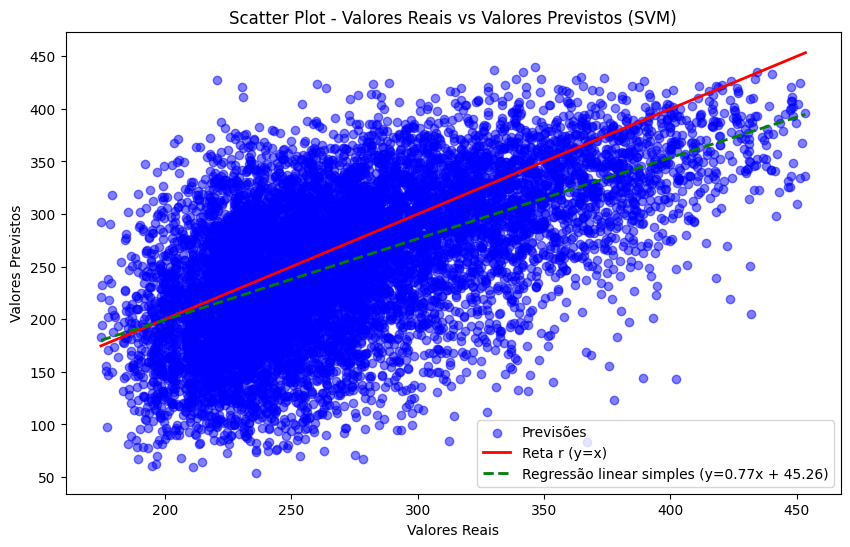

In [42]:
# Gráfico Scatter Plot Valores Reais x Valores Previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Reta r (y=x)')
plt.plot(x_line, y_line, color='green', lw=2, linestyle='--', label=f'Regressão linear simples (y={slope:.2f}x + {intercept:.2f})')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Scatter Plot - Valores Reais vs Valores Previstos (SVM)')
plt.legend()
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------